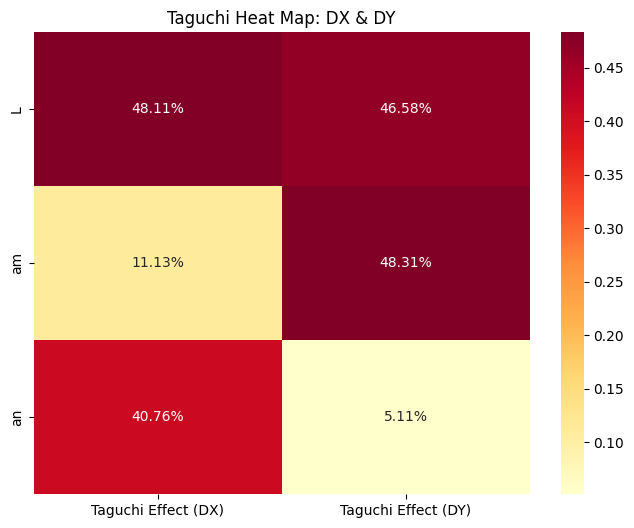

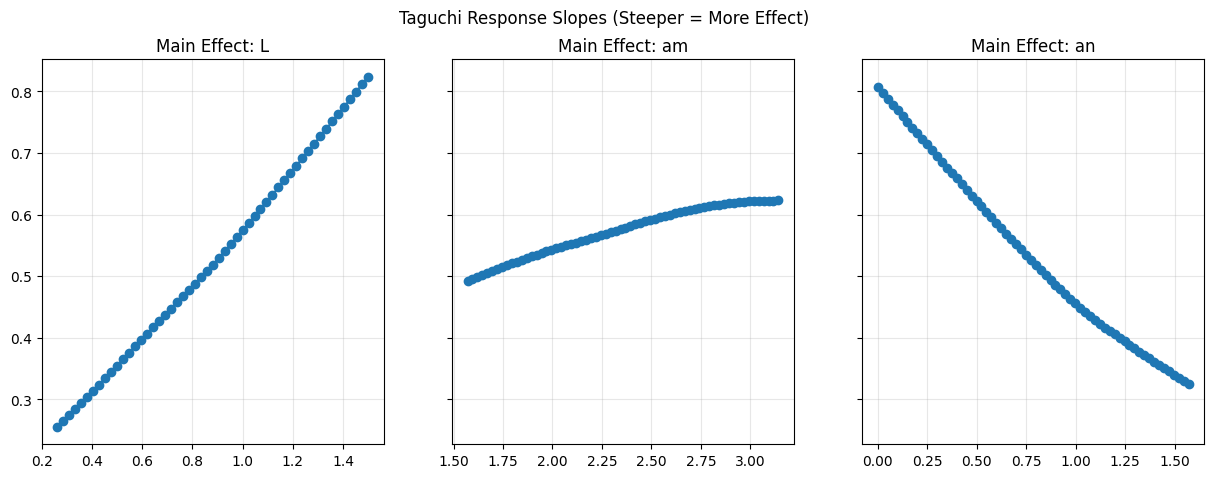

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Range = np.power(2,6)

L_range = np.linspace(0, 1.5, num=Range)
am_range = np.linspace(np.pi, np.pi/2, num=Range)
an_range = np.linspace(0, np.pi/2, num=Range)

L_grid, am_grid, an_grid = np.meshgrid(L_range, am_range, an_range)


def dx(L,am,an):
    return 2 * L * np.sin(0.25*(am - an)) * np.cos(0.25*(am + an))

def dy(L,am,an):
    return (-2) * L *np.sin(0.25*(an + am)) * np.sin(0.25*(an - am))

df = pd.DataFrame({
    'L': L_grid.ravel(),
    'am': am_grid.ravel(),
    'an': an_grid.ravel()
})

df['DX']=dx(df['L'],df['am'],df['an'])
df['DY']=dy(df['L'],df['am'],df['an'])
df_filtered = df[df['DX'] > 0.250].copy()

def get_taguchi_effect(data, ivs, dv):
    deltas = {}
    for var in ivs:
        # Calculate the mean of the output for every level of the input
        level_means = data.groupby(var)[dv].mean()
        # Delta = Max Mean - Min Mean
        deltas[var] = level_means.max() - level_means.min()
    
    # Normalize deltas to get a "Percentage Contribution" similar to your sensitivity function
    total_delta = sum(deltas.values())
    return {k: v/total_delta for k, v in deltas.items()}

# 1. Calculate for both DX and DY
iv_list = ['L', 'am', 'an']
effect_dx = get_taguchi_effect(df_filtered, iv_list, 'DX')
effect_dy = get_taguchi_effect(df_filtered, iv_list, 'DY')

# 2. Combine into a DataFrame for a Heatmap
taguchi_df = pd.DataFrame({
    'Taguchi Effect (DX)': effect_dx,
    'Taguchi Effect (DY)': effect_dy
})

# 3. Create the Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(taguchi_df, annot=True, fmt=".2%", cmap="YlOrRd")
plt.title("Taguchi Heat Map: DX & DY")
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for i, var in enumerate(iv_list):
    means = df_filtered.groupby(var)['DX'].mean()
    axes[i].plot(means.index, means.values, marker='o')
    axes[i].set_title(f'Main Effect: {var}')
    axes[i].grid(True, alpha=0.3)
plt.suptitle('Taguchi Response Slopes (Steeper = More Effect)')
plt.show()